In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTTools import remove_special
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image

parser = load_parser()

pictures_dir="pictures/language/"

Given that we want to find the *meet*, or common parts of the two Hns, we need an algorithm to find it and create a new Hn containing all the common parts.  When finding the meet, we want it as a Hn, not just a list, as we want to be able to analyse, manipulate, merge it, etc., but still see an Hn structure with all the related parts.

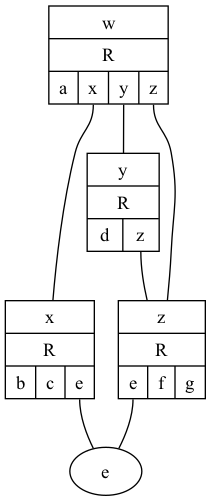

In [17]:
hn1 = Hypernetwork()

compile_hn(hn1, parser, """
    w=<a, x, y, z; R>
    x=<b, c, e; R>
    y=<d, z; R>
    z=<e, f, g; R>
""")

draw_hn(hn1, fname=pictures_dir+"meet-hn-1", view=False, show_vertex=False)
Image(filename=pictures_dir+"meet-hn-1.png", width=300, height=1200)

This is the first of the two Hn's, Figure 2 $Hn_1$.

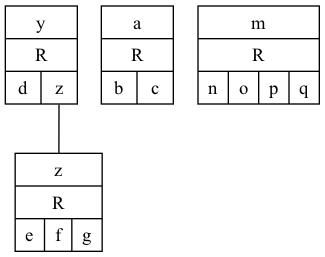

In [18]:
hn2 = Hypernetwork()

compile_hn(hn2, parser, """
    y=<d, z; R>
    z=<e, f, g; R>
    a=<b, c; R>
    m=<n, o, p, q; R>
""")

draw_hn(hn2, fname=pictures_dir+"meet-hn-2", view=False, show_vertex=False)
Image(filename=pictures_dir+"meet-hn-2.png", width=400, height=1200)

The second Hn, Figure 3 $Hn_2$.

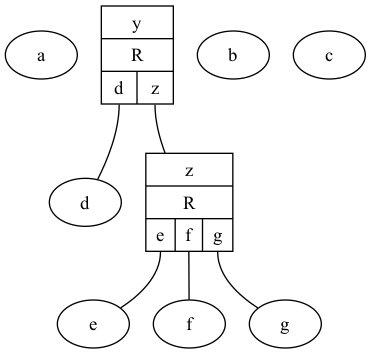

In [4]:
hn3 = Hypernetwork()

hn3.copy(hn1)
hn3.intersection(hn2)

draw_hn(hn3, fname=pictures_dir+"meet-hn-3", view=False)
Image(filename=pictures_dir+"meet-hn-3.png", width=400, height=1200)

In this diagram we see the meet between $Hn_1 \sqcap_{\vartriangle} Hn_2$ in that order and we get Figure 4.

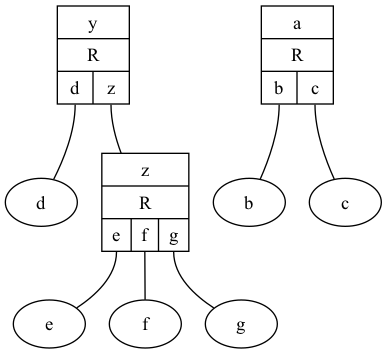

In [5]:
hn4 = Hypernetwork()

hn4.copy(hn2)
hn4.intersection(hn1)

draw_hn(hn4, fname=pictures_dir+"meet-hn-4", view=False)
Image(filename=pictures_dir+"meet-hn-4.png", width=400, height=1200)

However, in this diagram we see the intersection / meet between $Hn_2 \sqcap_{\vartriangle} Hn_1$ in that order and we get Figure 5.

This difference is because the algorithm iterates through the first model and compares it with the second.  If a match is found, the Hs is added to the new *meet* Hn.  However, if the same part exists in both, but in $Hs_1$, it is a vertex, and in $Hs_2$, it is an $\alpha$, which is perfectly legitimate because the $\alpha$ could be new information about the system that fills a gap.  Which should the algorithm choose?  The answer is we don't know, it depends!

There are two solutions to this problem:
1) Leave it as it is and allow the modeller to choose the order of Hns. However, this does have a disadvantage in that there could be situations where better versions of a Hs are in the second Hn and will not be picked up.
2) Standardise, or even provide a prioritisation, the order, e.g., ALPHA, BETA, VERTEX, so whichever Hs has a type of ALPHA would be used over a Hs that is a BETA, and so on.  

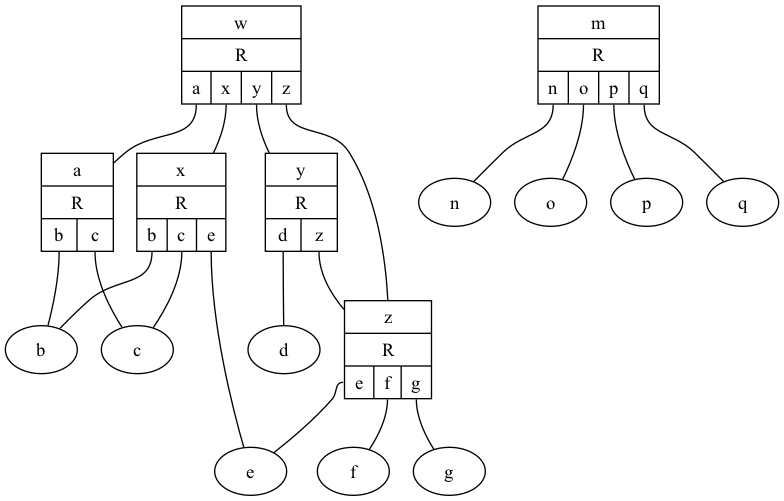

In [6]:
hn5 = Hypernetwork()

hn5.copy(hn1)
hn5.union(hn2)

draw_hn(hn5, fname=pictures_dir+"merge-hn-1", view=False)
Image(filename=pictures_dir+"merge-hn-1.png", width=800, height=1200)

## Merge with $\beta$s.

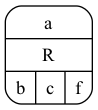

In [7]:
hn7 = Hypernetwork()

compile_hn(hn7, parser, """
    a={b, c, f; R}
""")

draw_hn(hn7, fname=pictures_dir+"merge-hn-7", view=False, show_vertex=False)
Image(filename=pictures_dir+"merge-hn-7.png", width=200, height=1200)

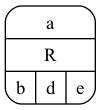

In [8]:
hn8 = Hypernetwork()

compile_hn(hn8, parser, """
    a={b, d, e; R}
""")

draw_hn(hn8, fname=pictures_dir+"merge-hn-8", view=False, show_vertex=False)
Image(filename=pictures_dir+"merge-hn-8.png", width=300, height=1200)

HELLO 1 ['b', 'c', 'd', 'e', 'f']


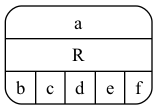

In [9]:
hn9 = Hypernetwork()

hn9.copy(hn7)
hn9.union(hn8)

draw_hn(hn9, fname=pictures_dir+"merge-hn-9", view=False, show_vertex=False)
Image(filename=pictures_dir+"merge-hn-9.png", width=400, height=1200)

## Merge with both $\alpha$ and $\beta$.

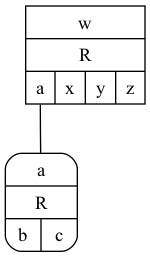

In [10]:
hn10 = Hypernetwork()

compile_hn(hn10, parser, """
    w=<a, x, y, z; R>
    a={b, c; R}
""")

draw_hn(hn10, fname=pictures_dir+"merge-hn-10", view=False, show_vertex=False)
Image(filename=pictures_dir+"merge-hn-10.png", width=400, height=1200)

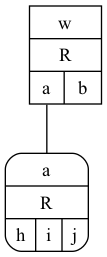

In [11]:
hn11 = Hypernetwork()

compile_hn(hn11, parser, """
    w=<a, b; R>
    a={h, i, j; R}
""")

draw_hn(hn11, fname=pictures_dir+"merge-hn-11", view=False, show_vertex=False)
Image(filename=pictures_dir+"merge-hn-11.png", width=300, height=1200)

HELLO 1 ['b', 'c', 'h', 'i', 'j']


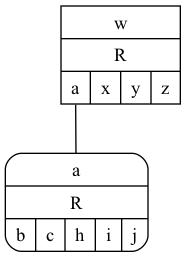

In [12]:
hn12 = Hypernetwork()

hn12.copy(hn11)
hn12.union(hn10)

draw_hn(hn12, fname=pictures_dir+"merge-hn-12", view=False, show_vertex=False)
Image(filename=pictures_dir+"merge-hn-12.png", width=500, height=1200)

HELLO 1 ['b', 'c', 'h', 'i', 'j']


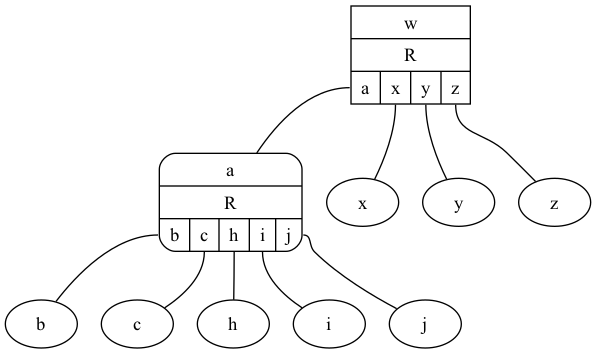

In [13]:
hn13 = Hypernetwork()

hn13.copy(hn11)
hn13.union(hn10)

draw_hn(hn13, fname=pictures_dir+"merge-hn-13", view=False)
Image(filename=pictures_dir+"merge-hn-13.png", width=500, height=1200)

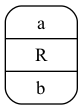

In [21]:
hn14 = Hypernetwork()

hn14.copy(hn7)
hn14.intersection(hn8, inc_whole_beta=False)

draw_hn(hn14, fname=pictures_dir+"meet-hn-14", view=False, show_vertex=False)
Image(filename=pictures_dir+"meet-hn-14.png", width=100, height=1200)

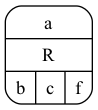

In [22]:
hn15 = Hypernetwork()

hn15.copy(hn7)
hn15.intersection(hn8)

draw_hn(hn15, fname=pictures_dir+"meet-hn-15", view=False, show_vertex=False)
Image(filename=pictures_dir+"meet-hn-15.png", width=100, height=1200)